# A8: K-Nearest Neighbors
Alex Dien
11/07/22

# Table of Contents

>[A8: K-Nearest Neighbors](#scrollTo=Hk0FF9Wsr-KO)

>[Table of Contents](#scrollTo=mo2g0z7dtnWo)

>[Task 1 - Prepare your data](#scrollTo=qsR-rr7MsX4U)

>>>[A. Data Import](#scrollTo=5YQ09-P_uuxC)

>>>[B. Show overall structure and summary of input data](#scrollTo=CY13OGHlu7cx)

>>>[C. Pop the target variable](#scrollTo=aFlMz8HUIKHJ)

>>>[C1: encode the target variable using the following code: y_target = pd.get_dummies(y_target,drop_first=True)](#scrollTo=8n5bHGovg48B)

>>>[D. Show the overall structure and summary of the data frame using info() describe() head()](#scrollTo=QnW1EhbStD3V)

>>>[E. Encode the dataframe using pd.get_dummies()](#scrollTo=Z6_k-N6miaAu)

>[Task 2](#scrollTo=Dc1iMMD8sdIs)

>>[Using StandardScaler fit and transform the data](#scrollTo=hbvWhC2UvhEz)

>>[Show the scaled dataframe](#scrollTo=47TwDd7dnYTn)

>[Task 3](#scrollTo=ZdAY1o-crYDv)

>>[Prepare a GridSearchCV dictionary to search neighbors](#scrollTo=nta4V8mfrlUG)

>>>[Search neighbors options 1 through 10 (ie 1,2,3,4,5,6,7,8,9,10)](#scrollTo=clEO1BohsVnD)

>>>[Use 3 fold cross validation in the gridsearchcv to examine f1 score](#scrollTo=ojo261fC8zy9)

>>>[Create a dataframe of the GridSearchResults](#scrollTo=IXlESjow88CD)

>[Task 4](#scrollTo=oQgf00QvYLCK)

>>>[Using matplotlib GridSearch dataframe plot the results of the grid search. The x axis should be the neighbors for each cross validation, the y axis should be the f1 score (mean_test_score)](#scrollTo=e1GhnEFEi-bc)

>>>[Show 15 rows of the dataframe sorted by the mean_test_score](#scrollTo=GE693Lbu1Juz)

>>>[In a text block explain models were  found to achieve the highest f1 score. What were the top 5 nearest neighbor values that achieve the best results?](#scrollTo=qyndpkYK40vj)

>[Mounting](#scrollTo=1PjvY40XhUfg)



# Task 1 - Prepare your data

### A. Data Import

In [56]:
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix,\
recall_score, precision_score, f1_score, accuracy_score, make_scorer,\
precision_recall_fscore_support, mean_absolute_error, mean_squared_error

from sklearn.model_selection import train_test_split, cross_validate

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier


In [57]:
df = pd.read_csv("https://raw.githubusercontent.com/matthewpecsok/4482_fall_2022/main/data/CD_additional_modified.csv")

### B. Show overall structure and summary of input data

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4117 non-null   int64  
 1   job             4117 non-null   object 
 2   marital         4117 non-null   object 
 3   education       4117 non-null   object 
 4   default         4117 non-null   object 
 5   housing         4117 non-null   object 
 6   loan            4117 non-null   object 
 7   contact         4117 non-null   object 
 8   month           4117 non-null   object 
 9   day_of_week     4117 non-null   object 
 10  duration        4117 non-null   int64  
 11  campaign        4117 non-null   int64  
 12  pdays           4117 non-null   int64  
 13  previous        4117 non-null   int64  
 14  poutcome        4117 non-null   object 
 15  emp_var_rate    4117 non-null   float64
 16  cons_price_idx  4117 non-null   float64
 17  cons_conf_idx   4117 non-null   f

In [59]:
# Show overall structure
df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,4117.000000,4117,4117,4117,4117,4117,4117,4117,4117,4117,...,4117.000000,4117.000000,4117.000000,4117,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117
unique,NaN,12,4,7,2,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,1012,2508,1264,3314,2175,3347,2650,1378,860,...,NaN,NaN,NaN,3522,NaN,NaN,NaN,NaN,NaN,3666
mean,40.115375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.537042,960.403449,0.190187,NaN,0.085742,93.580131,-40.500947,3.621904,5166.496502,NaN
std,10.314847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.568668,191.967524,0.541765,NaN,1.562799,0.579061,4.593445,1.733448,73.670942,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.635000,4963.600000,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.334000,5099.100000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [60]:
# Summary of df
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


### C. Pop the target variable

In [61]:
y_target = df.pop('y')

### C1: encode the target variable using the following code: y_target = pd.get_dummies(y_target,drop_first=True)

In [62]:
y_target = pd.get_dummies(y_target,drop_first=True)

### D. Show the overall structure and summary of the data frame using info() describe() head() 

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4117 non-null   int64  
 1   job             4117 non-null   object 
 2   marital         4117 non-null   object 
 3   education       4117 non-null   object 
 4   default         4117 non-null   object 
 5   housing         4117 non-null   object 
 6   loan            4117 non-null   object 
 7   contact         4117 non-null   object 
 8   month           4117 non-null   object 
 9   day_of_week     4117 non-null   object 
 10  duration        4117 non-null   int64  
 11  campaign        4117 non-null   int64  
 12  pdays           4117 non-null   int64  
 13  previous        4117 non-null   int64  
 14  poutcome        4117 non-null   object 
 15  emp_var_rate    4117 non-null   float64
 16  cons_price_idx  4117 non-null   float64
 17  cons_conf_idx   4117 non-null   f

In [64]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000
mean,40.115375,256.850376,2.537042,960.403449,0.190187,0.085742,93.580131,-40.500947,3.621904,5166.496502
std,10.314847,254.749615,2.568668,191.967524,0.541765,1.562799,0.579061,4.593445,1.733448,73.670942
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [65]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8


### E. Encode the dataframe using pd.get_dummies() 


In [66]:
X = pd.get_dummies(df)

In [67]:
X.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,0,0,1,0,0,0,0,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,0,0,1,0,0,0,0,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,0,0,0,1,0,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,0,0,1,0,0,0,0,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,0,0,0,1,0,0,0,0,1,0


# Task 2


## 1. Using StandardScaler fit and transform the data 


In [68]:
# StandardScaler
pd.DataFrame(StandardScaler().fit_transform(X))

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,-0.980781,0.903544,-0.209099,0.201082,-0.351094,-1.206791,-1.186776,-1.240843,-1.332133,-0.914943,...,-0.130558,-0.125661,2.088223,-0.511966,-0.513855,-0.506292,-0.488816,-0.351618,0.411021,-0.189006
1,-0.108146,0.349992,0.569609,0.201082,-0.351094,0.649080,0.714811,0.892891,0.711441,0.332648,...,-0.130558,-0.125661,2.088223,-0.511966,-0.513855,-0.506292,-0.488816,-0.351618,0.411021,-0.189006
2,-1.465578,-0.117190,-0.598453,0.201082,-0.351094,0.841066,1.528296,-0.282840,0.773175,0.836300,...,-0.130558,-0.125661,-0.478876,-0.511966,-0.513855,-0.506292,2.045761,-0.351618,0.411021,-0.189006
3,-0.205106,-0.941629,0.180255,0.201082,-0.351094,0.841066,1.528296,-0.282840,0.771444,0.836300,...,-0.130558,-0.125661,2.088223,-0.511966,-0.513855,-0.506292,-0.488816,-0.351618,0.411021,-0.189006
4,0.667529,-0.780667,-0.598453,0.201082,-0.351094,-0.118867,-0.656542,-0.326386,0.328343,0.397810,...,-0.130558,-0.125661,-0.478876,1.953255,-0.513855,-0.506292,-0.488816,-0.351618,0.411021,-0.189006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4112,-0.980781,-0.800296,-0.598453,0.201082,-0.351094,0.841066,0.583548,-0.478795,0.770867,0.836300,...,-0.130558,-0.125661,-0.478876,-0.511966,1.946075,-0.506292,-0.488816,-0.351618,0.411021,-0.189006
4113,-0.108146,-0.148597,-0.598453,0.201082,-0.351094,0.841066,0.583548,-0.478795,0.771444,0.836300,...,-0.130558,-0.125661,2.088223,-0.511966,-0.513855,-0.506292,-0.488816,-0.351618,0.411021,-0.189006
4114,-1.271659,-0.757111,-0.209099,0.201082,1.494950,-1.206791,-1.186776,-1.240843,-1.308478,-0.914943,...,-0.130558,-0.125661,-0.478876,1.953255,-0.513855,-0.506292,-0.488816,2.843994,-2.432967,-0.189006
4115,1.734083,1.064506,-0.598453,0.201082,-0.351094,0.841066,-0.235119,0.958209,0.775483,0.836300,...,-0.130558,-0.125661,2.088223,-0.511966,-0.513855,-0.506292,-0.488816,-0.351618,0.411021,-0.189006


## 2. Show the scaled dataframe



In [69]:
X_random_columns_scaled = X.copy()

#now scale

# keep the column names since we will lose them
column_names = X_random_columns_scaled.columns

X_random_columns_scaled = StandardScaler().fit_transform(X_random_columns_scaled)
X_random_columns_scaled = pd.DataFrame(X_random_columns_scaled,columns = column_names )
print("\n",'scaled')
X_random_columns_scaled.head()


 scaled


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,-0.980781,0.903544,-0.209099,0.201082,-0.351094,-1.206791,-1.186776,-1.240843,-1.332133,-0.914943,...,-0.130558,-0.125661,2.088223,-0.511966,-0.513855,-0.506292,-0.488816,-0.351618,0.411021,-0.189006
1,-0.108146,0.349992,0.569609,0.201082,-0.351094,0.649080,0.714811,0.892891,0.711441,0.332648,...,-0.130558,-0.125661,2.088223,-0.511966,-0.513855,-0.506292,-0.488816,-0.351618,0.411021,-0.189006
2,-1.465578,-0.117190,-0.598453,0.201082,-0.351094,0.841066,1.528296,-0.282840,0.773175,0.836300,...,-0.130558,-0.125661,-0.478876,-0.511966,-0.513855,-0.506292,2.045761,-0.351618,0.411021,-0.189006
3,-0.205106,-0.941629,0.180255,0.201082,-0.351094,0.841066,1.528296,-0.282840,0.771444,0.836300,...,-0.130558,-0.125661,2.088223,-0.511966,-0.513855,-0.506292,-0.488816,-0.351618,0.411021,-0.189006
4,0.667529,-0.780667,-0.598453,0.201082,-0.351094,-0.118867,-0.656542,-0.326386,0.328343,0.397810,...,-0.130558,-0.125661,-0.478876,1.953255,-0.513855,-0.506292,-0.488816,-0.351618,0.411021,-0.189006


# Task 3

## 1.  Prepare a GridSearchCV dictionary to search neighbors

### 1. Search neighbors options 1 through 10 (ie 1,2,3,4,5,6,7,8,9,10)


In [70]:
parameters = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10],
              'p' : [1,2]}


### 2. Use 3 fold cross validation in the gridsearchcv to examine f1 score 


In [71]:
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters, scoring='f1', cv=3, return_train_score=True).fit(X_random_columns_scaled, y_target)

### 3. Create a dataframe of the GridSearchResults 


In [72]:
result_df = pd.DataFrame(clf.cv_results_)
result_df[result_df['rank_test_score']==1]['mean_test_score']

1    0.333973
Name: mean_test_score, dtype: float64

# Task 4

### Using matplotlib GridSearch dataframe plot the results of the grid search. The x axis should be the neighbors for each cross validation, the y axis should be the f1 score (mean_test_score)

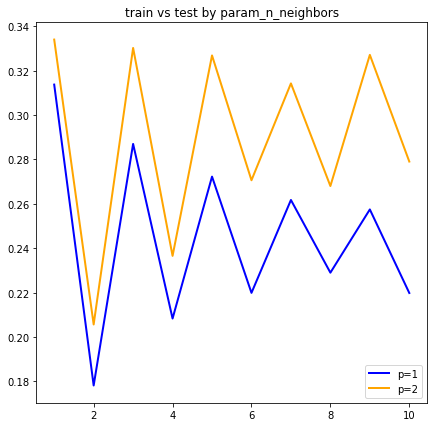

In [73]:
plt.figure(figsize=(7,7))
plt.plot('param_n_neighbors', 'mean_test_score', data=result_df[result_df['param_p']==1], marker='', color='blue', linewidth=2, label="p=1")
plt.plot('param_n_neighbors', 'mean_test_score', data=result_df[result_df['param_p']==2], marker='', color='orange', linewidth=2, label="p=2")


plt.legend()
plt.title("train vs test by param_n_neighbors")
plt.show()

### 2. Show 15 rows of the dataframe sorted by the mean_test_score 



In [74]:
df = pd.DataFrame(clf.cv_results_)
df = df.sort_values(by="mean_test_score", ascending=False)
df.head(15)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
1,0.004864,0.000068,0.110263,0.002646,1,2,"{'n_neighbors': 1, 'p': 2}",0.288973,0.329670,0.383275,0.333973,0.038619,1,1.000000,1.000000,1.000000,1.000000,0.000000
5,0.004903,0.000146,0.135354,0.006540,3,2,"{'n_neighbors': 3, 'p': 2}",0.301370,0.333333,0.355932,0.330212,0.022384,2,0.601227,0.634855,0.579399,0.605160,0.022810
17,0.004824,0.000073,0.148910,0.003517,9,2,"{'n_neighbors': 9, 'p': 2}",0.321951,0.306931,0.352381,0.327088,0.018907,3,0.406780,0.408759,0.384236,0.399925,0.011123
9,0.004782,0.000167,0.157871,0.017322,5,2,"{'n_neighbors': 5, 'p': 2}",0.312195,0.341014,0.327273,0.326827,0.011769,4,0.503401,0.455581,0.426540,0.461841,0.031689
13,0.005675,0.001422,0.157284,0.008518,7,2,"{'n_neighbors': 7, 'p': 2}",0.306931,0.302439,0.333333,0.314234,0.013629,5,0.425121,0.448113,0.411765,0.428333,0.015012
0,0.008708,0.004355,0.483015,0.005311,1,1,"{'n_neighbors': 1, 'p': 1}",0.253968,0.313433,0.373702,0.313701,0.048882,6,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.005601,0.001179,0.491424,0.036975,3,1,"{'n_neighbors': 3, 'p': 1}",0.277778,0.293578,0.289593,0.286983,0.006709,7,0.589247,0.584416,0.568928,0.580864,0.008667
19,0.004892,0.000157,0.150505,0.005221,10,2,"{'n_neighbors': 10, 'p': 2}",0.275132,0.264550,0.297436,0.279039,0.013707,8,0.366412,0.335958,0.300268,0.334213,0.027031
8,0.004788,0.000034,0.505946,0.026057,5,1,"{'n_neighbors': 5, 'p': 1}",0.241206,0.288462,0.287081,0.272250,0.021958,9,0.472222,0.467593,0.433090,0.457635,0.017458
11,0.007031,0.000136,0.233989,0.012375,6,2,"{'n_neighbors': 6, 'p': 2}",0.243386,0.279793,0.288660,0.270613,0.019590,10,0.382653,0.343008,0.334218,0.353293,0.021069


### 3. In a text block explain models were  found to achieve the highest f1 score. What were the top 5 nearest neighbor values that achieve the best results?

The top 5 nearest neighbor values that achieved the best results are #1 with mean_test_score of .3339, #5 mean_test_score of .3302, #17 mean_test_score of .3270, #9 with .3268, and #13 with .3142. We can observe that the mean test scores are relatively similar, and have slight variation.  

# Mounting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!cp "/content/drive/My Drive/Colab Notebooks/A8_Dien_Alex.ipynb" ./

# create html from ipynb
!jupyter nbconvert --to html "A8_Dien_Alex.ipynb"